### Arbol de Decisión para Regresión(Predecir)

##### Importar librerías

In [1]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Arbol de decisión
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

##Librerías métricas
from sklearn import metrics

##Graficar el arbol
from sklearn import tree

##Evitar warnings
import warnings
warnings.filterwarnings('ignore')

#### Funciones importantes

In [7]:
##Función de carga desde url
def cargaDI(url, sep=None):
    return pd.read_csv(url, sep=sep)

##Función para grafica el modelo
def grafreg (varX, xtest, ytest, ypred, modelo):
    X_grid = np.arange(min(varX), max(varX), 0.01)
    X_grid = X_grid.reshape((len(X_grid),1))
    plt.scatter(xtest, ytest, color='red')
    plt.scatter(xtest, ypred, color='green')
    plt.title('Modelo de arbol de decisión para Regresión')
    plt.xlabel('Temperatura')
    plt.ylabel('Revenue')
    plt.show()

    plt.plot(X_grid, modelo.predict(X_grid), color='blue')
    plt.title('Rendimiento del arbol de decisión para Regresión')
    plt.xlabel('Temperatura')
    plt.ylabel('Revenue')
    plt.show()

#### Proceso de modelado

In [3]:
## Importar data
datos = cargaDI('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

datos.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


#### Modelo y Entrenamiento

In [46]:
##Particion de la data
X = datos['Temperature'].values
y = datos['Revenue'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

regresor = DecisionTreeRegressor(max_depth=3)

modelo = regresor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = modelo.predict(X_test.reshape(-1,1))

df = pd.DataFrame({'Valores Actuales':y_test.reshape(-1), 'Valores Predecidos':y_pred.reshape(-1)})

df.head()



,Valores Actuales,Valores Predecidos
0,441.002944,400.067067
1,249.884252,148.774559
2,394.168620,400.067067
3,646.266946,632.335063
4,216.183462,148.774559


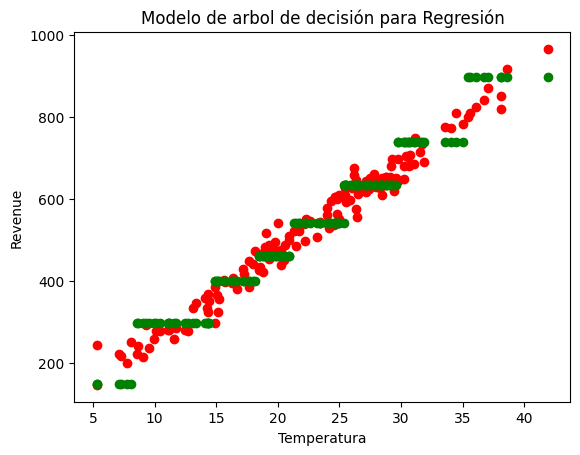

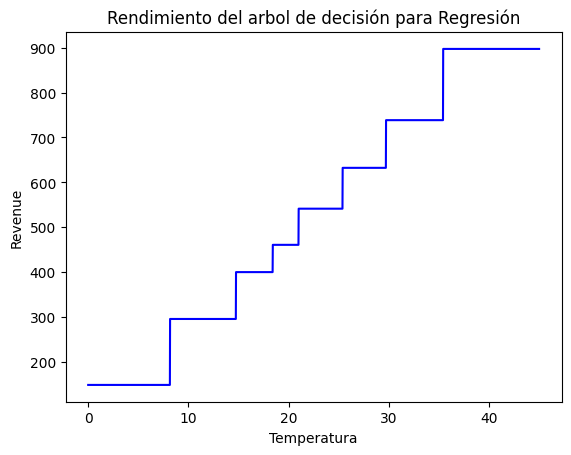

In [47]:
###Grafica del rendimiento del modelo y ajuste de datos
grafreg(X, X_test, y_test, y_pred, modelo)

#### Métricas del modelo

In [48]:
print('La eficiencia del modelo es:', round(metrics.r2_score(y_test, y_pred),3)*100)
print('Error mediatico cuadrático (RMSE)', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))


La eficiencia del modelo es: 93.8
Error mediatico cuadrático (RMSE) 42.621


In [44]:
##Unidades reales de revenue - MSE
(33.982/500)*100

6.796399999999999

#### Paso final: Graficar el arbol

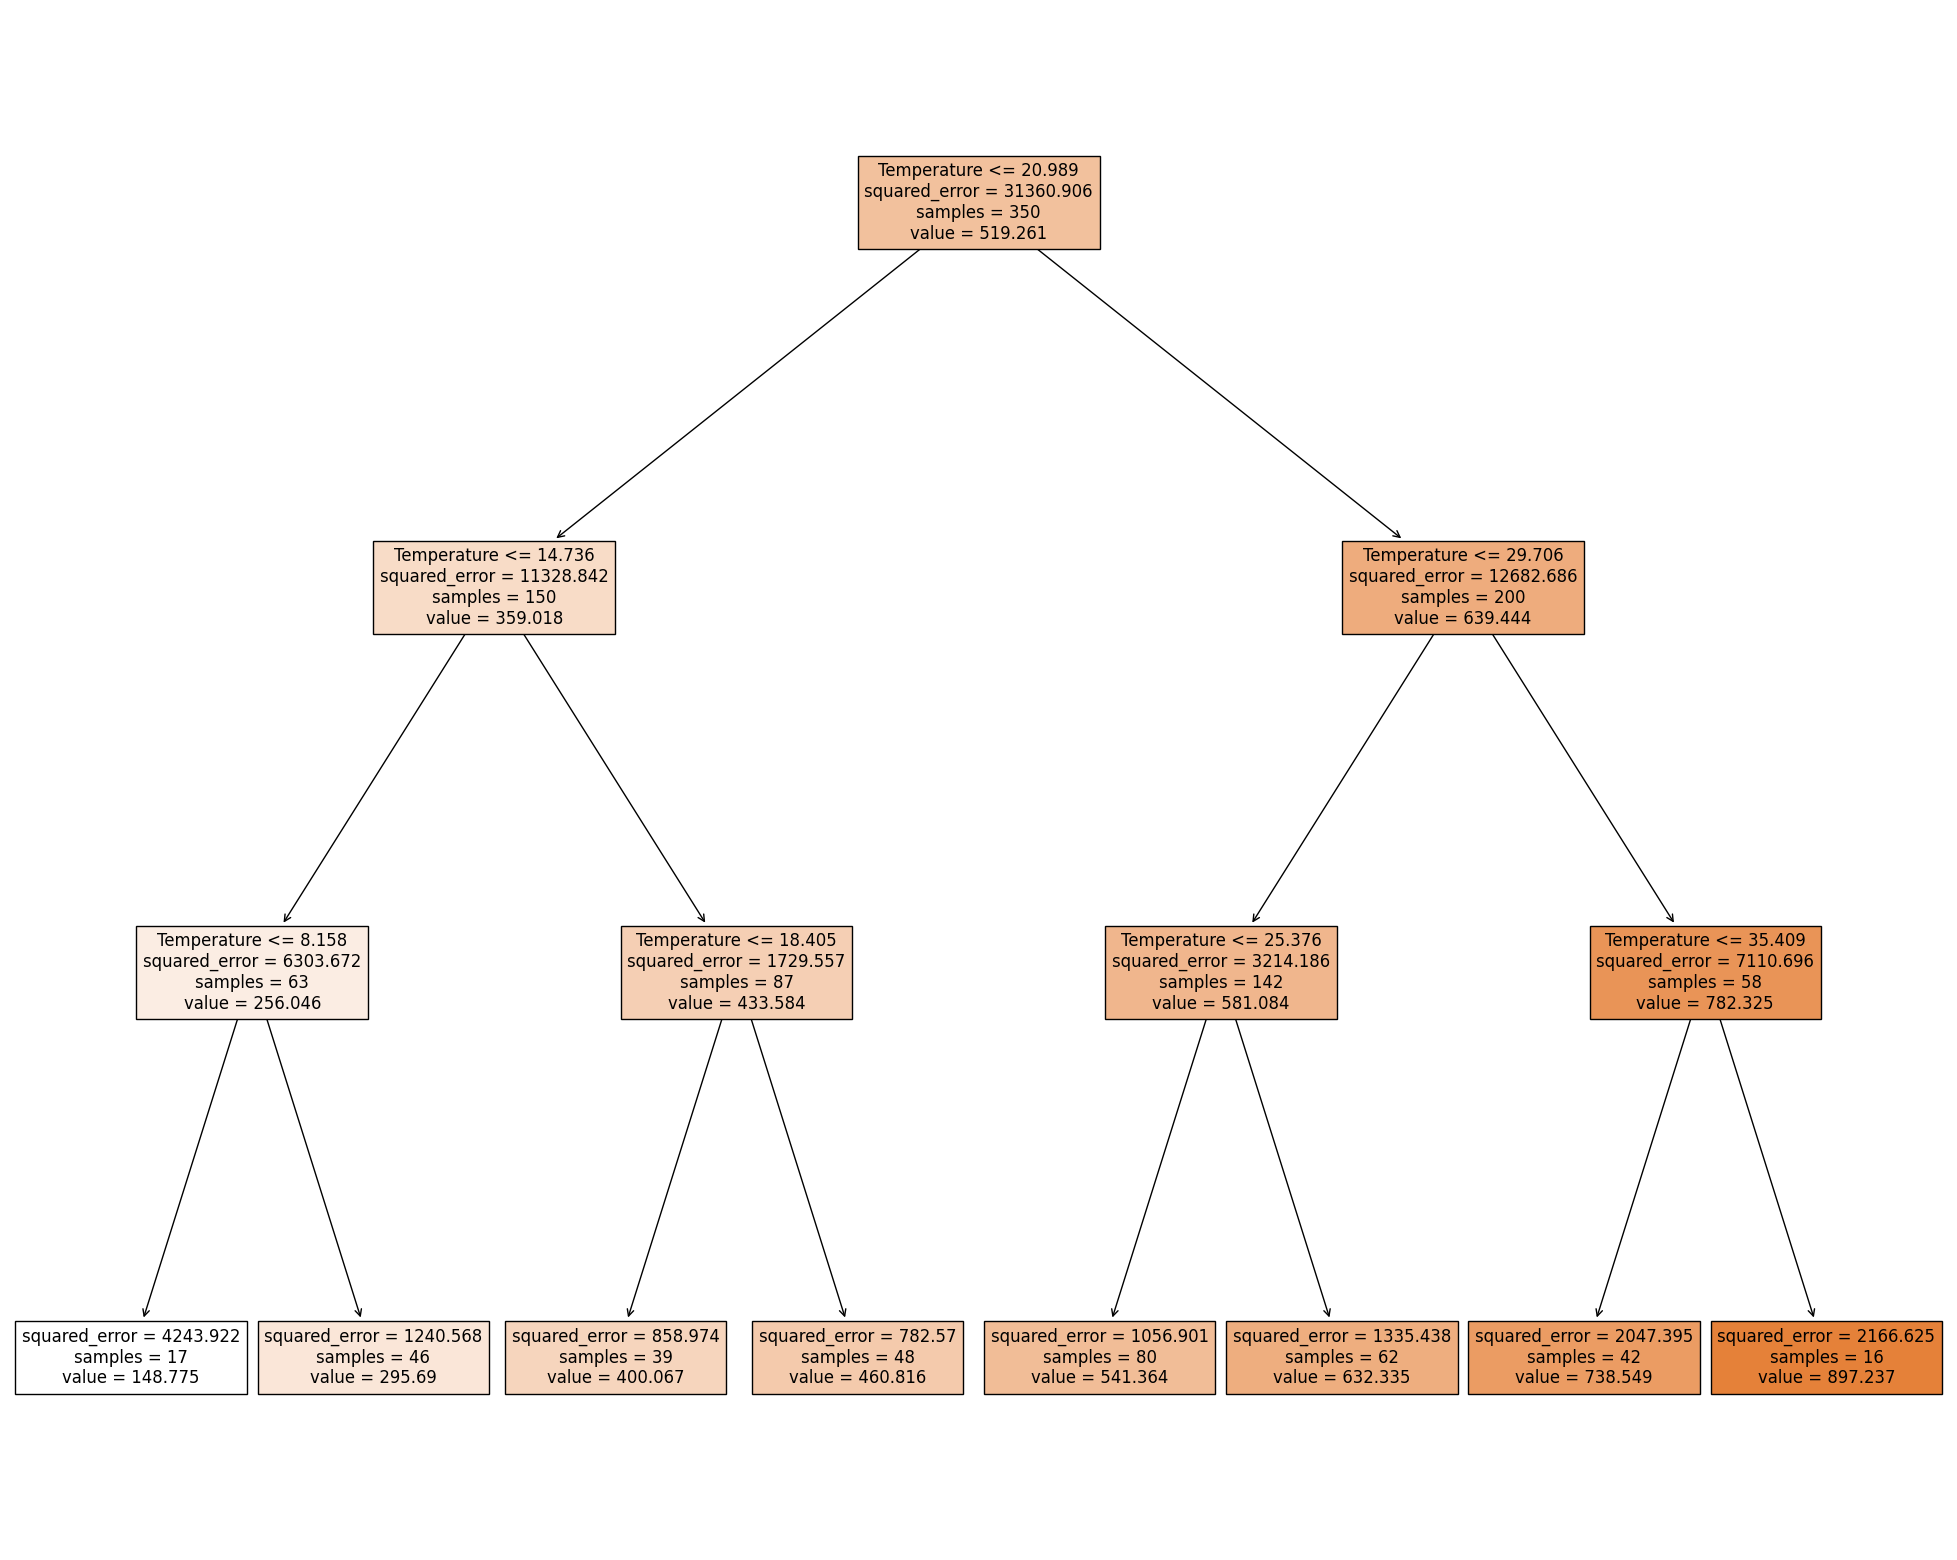

In [49]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(modelo, feature_names=datos.columns, filled=True)